In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmp927cdakr/pubring.gpg' created
gpg: /tmp/tmp927cdakr/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


KeyboardInterrupt: ignored

In [3]:
!pip install fastai

  Using cached https://files.pythonhosted.org/packages/50/6d/9d0d6e17a78b0598d5e8c49a0d03ffc7ff265ae62eca3e2345fab14edb9b/fastai-0.7.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ca/0d/f00b2885711e08bd71242ebe7b96561e6f6d01fdb4b9dcf4d37e2e13c5e1/torchvision-0.2.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5b/a5/e8b50b55b1abac9f1e3346c4242f1e42a82d368a8442cbd50c532922f6c4/torch-0.3.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c2/d4/fe7e2637975c476734fcbf53776e650a29680194eb0dd21dbdc020ca92de/isoweek-1.3.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3d/a7/0364272be0c6561c45d67edec8a7bf0532d56b830438168f9078f7720f63/pandas-summary-0.0.41.tar.gz
  Using cached https://files.pythonhosted.org/packages/c5/9e/42d7bcddb09a3ff52d0c60c810ba5d0fded28abbe320c85bbf7368192956/sklearn_pandas-1.6.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/pa

  Using cached https://files.pythonhosted.org/packages/52/01/8a3b4c6e45749674a1e5241174b4b63cd6435125e124bec275f3e02c96ac/mizani-0.4.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/90/ff/047e0dca2627b162866920e7aa93f04523c0ae81e5c67060eec85701992d/qtconsole-4.3.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/77/82/6469cd7fccf7958cbe5dce2e623f1e3c5e27f1bb1ad36d90519bc2d5d370/jupyter_console-5.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fe/27/576e6c979bfa5f63070f809c930aa85d6198b91d17a64866234597ba861f/pyarrow-0.9.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/56/8a/84537c0354f0d1f03bf644b71bf8e0a50db9c1294181905721a5f3efbf66/palettable-3.1.1-py2.py3-none-any.whl
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/86/a9/6b/36b727a9ec687dac08bd3d0501cddd7b1a223943513eb04a03
  Running setup.py

 \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built pandas-summary bcolz
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [4]:
!pip install scipy==1.0.0

    100% |████████████████████████████████| 50.0MB 969kB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: scipy 0.19.1
    Uninstalling scipy-0.19.1:
      Successfully uninstalled scipy-0.19.1


In [5]:
!pip install pillow==4.1.1

    100% |████████████████████████████████| 5.7MB 5.6MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [4]:
import os 
os.chdir("drive/AI")

In [1]:
from fastai.imports import*
from fastai.structured import*

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [5]:
df_raw = pd.read_csv('HousePrice/train.csv', low_memory=False, parse_dates=['YearBuilt','YearRemodAdd'])

In [6]:
df_test = pd.read_csv('HousePrice/test.csv', low_memory = False, parse_dates = ['YearBuilt','YearRemodAdd'])

In [7]:
def display_all(df):
  with pd.option_context("display.max_rows", 1000,"display.max_columns",1000):
    display(df)
  

In [11]:
total = df_raw.isnull().sum().sort_values(ascending=False)
percent = (df_raw.isnull().sum()/len(df_raw)).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis =1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [12]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis =1,keys=['Total','Percent'])
missing_data.head(33)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [8]:
add_datepart(df_raw, 'YearBuilt')
add_datepart(df_raw, 'YearRemodAdd')

In [9]:
train_cats(df_raw)

In [10]:
df, y, nas = proc_df(df_raw,'SalePrice')

In [11]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df,y)
m.score(df,y)

0.9688343816802786

In [12]:
def Rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m,df,y):
  res = [Rmse(m.predict(df),y), m.score(df,y)]
  if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
  print(res)

In [13]:
m = RandomForestRegressor(n_estimators = 140 , n_jobs=-1 ,max_features =0.5, oob_score =True)
m.fit(df,y)
print_score(m,df,y)

[10498.2685095465, 0.9825246018307061, 0.8673464299493567]


In [14]:
fi = rf_feat_importance(m, df); fi[:10]

,cols,imp
17,OverallQual,0.323812
59,GarageCars,0.126572
44,GrLivArea,0.123164
25,ExterQual,0.052608
36,TotalBsmtSF,0.041704
41,1stFlrSF,0.030564
90,YearBuiltElapsed,0.027982
60,GarageArea,0.027419
32,BsmtFinSF1,0.023588
42,2ndFlrSF,0.023050


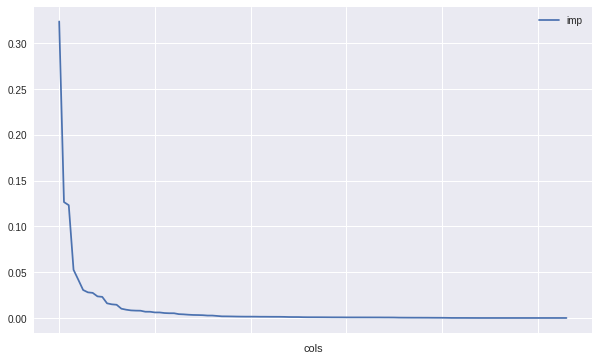

In [15]:
fi.plot('cols', 'imp', figsize=(10,6), legend =True);

In [16]:
def plot_fi(fi): return fi.plot('cols','imp','barh', figsize=(12,7), legend = False)

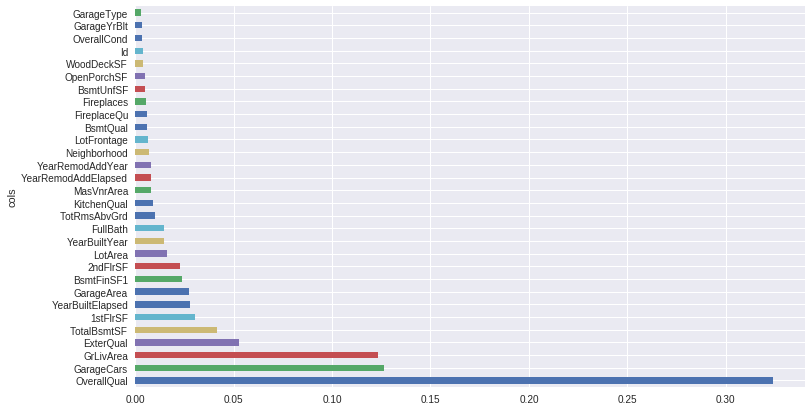

In [17]:
plot_fi(fi[:30]);

In [18]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

25

In [19]:
df_keep = df[to_keep].copy()

In [35]:
def print_score1(m):
  res = [Rmse(m.predict(df_keep),y), m.score(df_keep,y)]
  if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
  print(res)

In [20]:
m = RandomForestRegressor(n_jobs=-1 ,n_estimators = 140, max_features=0.5, oob_score=True)
m.fit(df_keep,y)
print_score(m,df_keep,y)

[10323.659790522077, 0.9831010743378931, 0.8693317401319534]


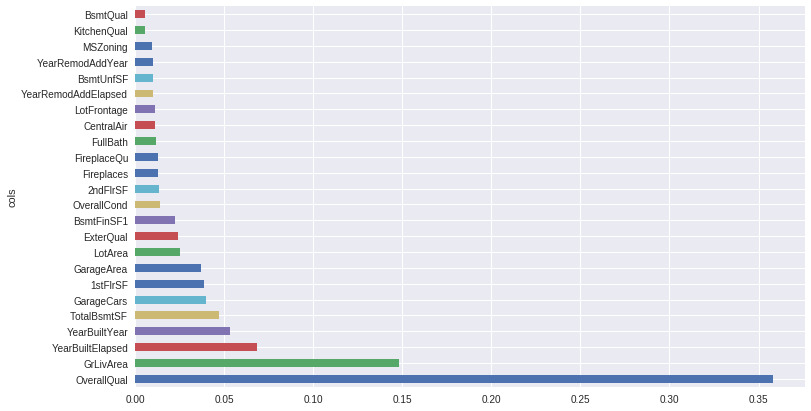

In [37]:
fi = rf_feat_importance(m,df_keep)
plot_fi(fi);

In [38]:
df_train, y_train , nas = proc_df(df_raw,'SalePrice', max_n_cat=7)


In [42]:
m = RandomForestRegressor(n_estimators =140, n_jobs =-1, max_features=0.5,oob_score=True)
m.fit(df_train,y)
print_score(m, df_train,y)

[0.051769543342508974, 0.9831919504905141, 0.8776084855440907]


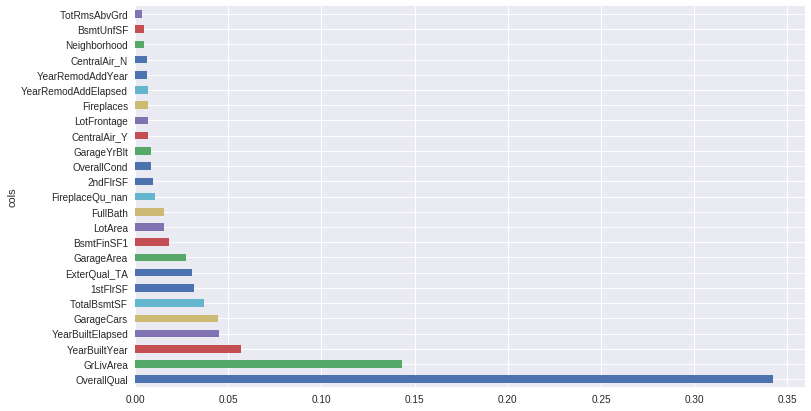

In [43]:
fi = rf_feat_importance(m,df_train)
plot_fi(fi[:25]);

In [44]:
from scipy.cluster import hierarchy as hc

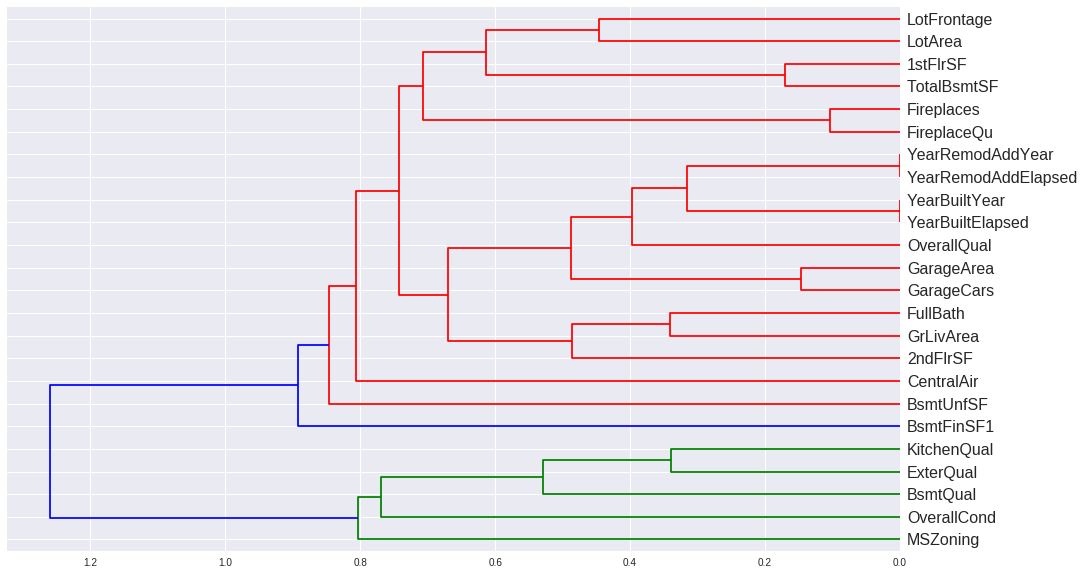

In [47]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method = 'average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels = df_keep.columns, orientation='left',leaf_font_size=16)
plt.show()

In [48]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=140,  max_features=0.5, n_jobs=-1, oob_score=True)
  
    m.fit(df, y)
    return m.oob_score_

In [49]:
get_oob(df_keep)

0.8827793771784609

In [50]:
for c in ('YearRemodAddYear','YearRemodAddElapsed','YearBuiltYear','YearBuiltElapsed'):
  print(c, get_oob(df_keep.drop(c, axis=1)))

YearRemodAddYear 0.8814492230497134
YearRemodAddElapsed 0.8801825068602732
YearBuiltYear 0.87997819664518
YearBuiltElapsed 0.8779313035185407


In [51]:
to_drop =['YearRemodAddYear','YearBuiltYear']
get_oob(df_keep.drop(to_drop, axis=1))

0.8798044224198927

**TEST SET**

In [21]:
add_datepart(df_test,'YearBuilt')
add_datepart(df_test,'YearRemodAdd')

In [22]:
train_cats(df_test)

In [23]:
df_test_proc, _, nas = proc_df(df_test, y_fld =None , na_dict=nas)

In [58]:
df_test_proc.shape

(1459, 115)

In [59]:
df.shape

(1460, 107)

In [24]:
df_test_proc.drop(['BsmtFinSF1_na','BsmtFinSF2_na','BsmtFullBath_na','BsmtHalfBath_na','BsmtUnfSF_na','GarageArea_na','GarageCars_na','TotalBsmtSF_na'] , axis= 1, inplace= True)

In [25]:
df_test_keep = df_test_proc[to_keep].copy()

In [26]:
m = RandomForestRegressor(n_estimators=140, n_jobs=-1,max_features= 0.5, oob_score=True)
m.fit(df_keep,y)
print_score(m,df_keep,y)
y = m.predict(df_test_keep)

[10479.721627523628, 0.9825862934988009, 0.867606357202912]


In [27]:
np.savetxt("EDA(HousingPrice)1.csv", y, delimiter=",")